In [1]:
import torch
import numpy as np

import ast
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt

In [2]:
import model
import train

In [ ]:
embedding_dim, transformation, embeddings = model.read_pretrained_vocabs("../training_embeddings_tree/trained_embeddings.vec")

In [3]:
embedding_dim, transformation, embeddings = model.read_pretrained_vocabs("../training_embeddings_tree/trained_embeddings.vec")

In [4]:
inverse = {id:node for node, id in transformation.items()}

In [5]:
from sklearn.decomposition import PCA

In [6]:
pca = PCA(n_components=2)
pca.fit(embeddings)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [7]:
t = pca.transform(embeddings)

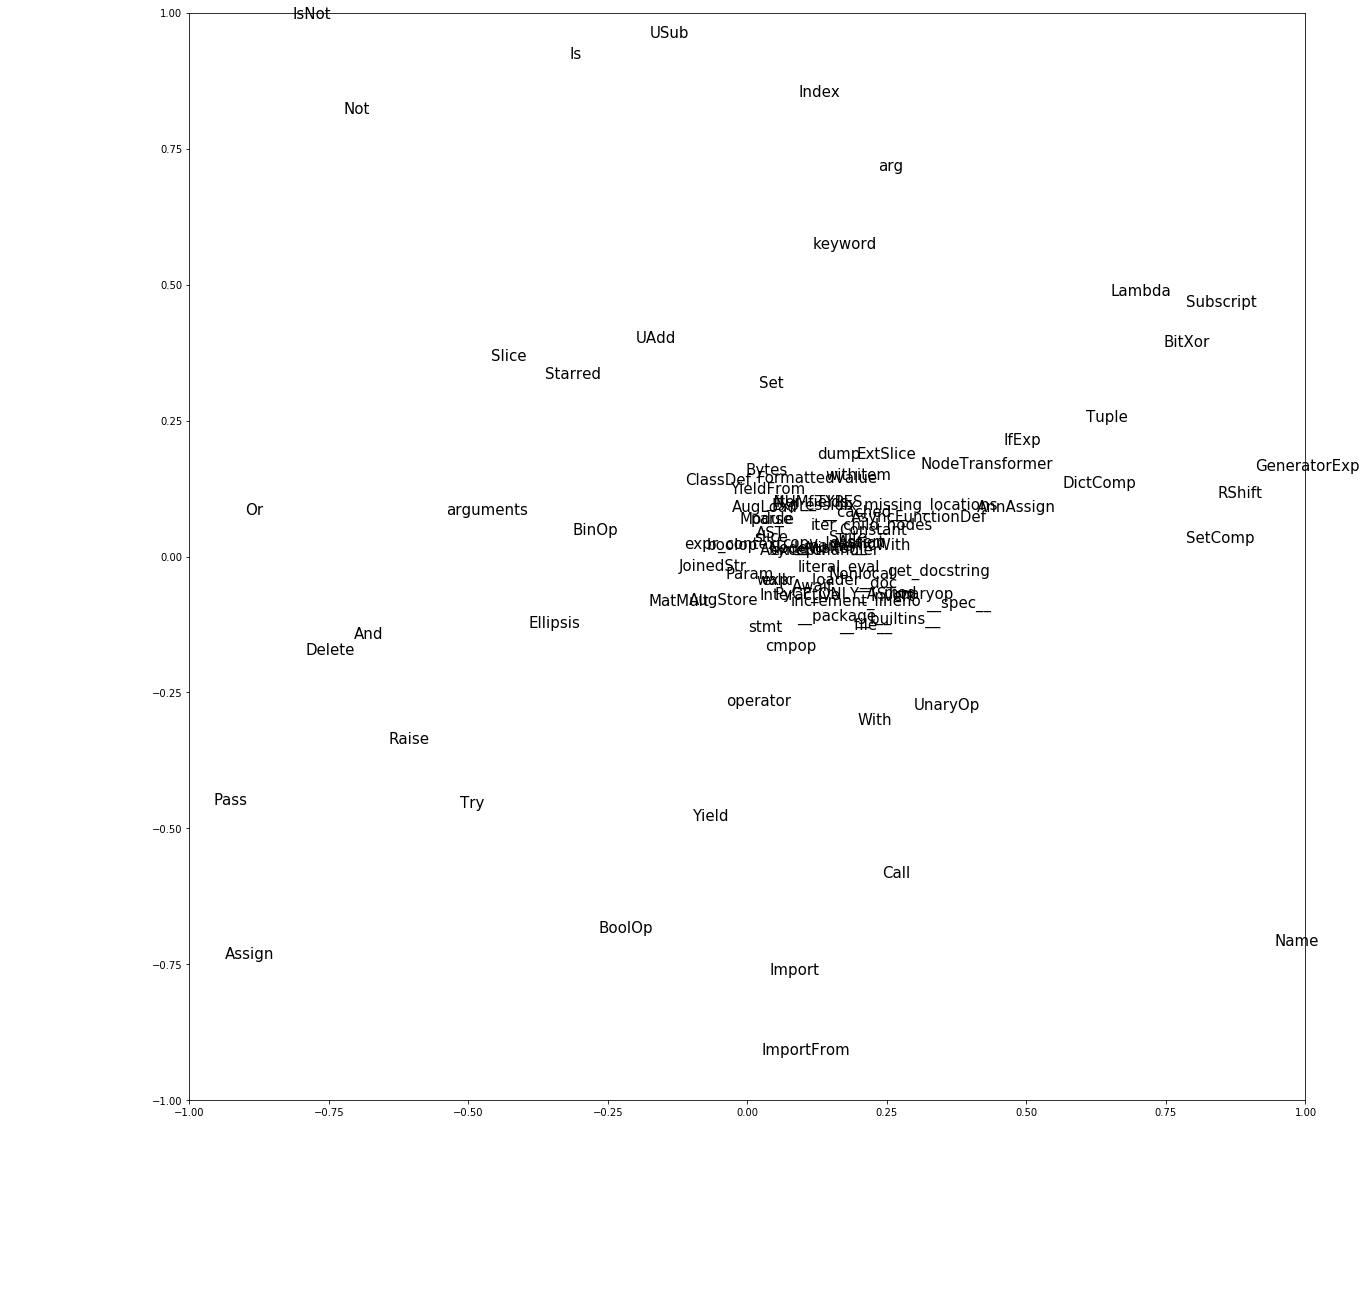

In [21]:
plt.figure(figsize=(20, 20))
for name, id in transformation.items():
    plt.annotate(name, t[id], color='black', fontsize=15)
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
plt.show()

In [9]:
from sklearn.metrics.pairwise import cosine_similarity

In [10]:
similarity = cosine_similarity(embeddings, embeddings)

def find_nearest(node, k = 10):
    id = transformation[node]
    
    nearest = np.argsort(-similarity[id])
    
#     print(nearest)
    
    return [(inverse[pos], similarity[id, pos]) for pos in nearest if pos != id][:k]
    

In [11]:
find_nearest("For")

[('If', 0.7109514235424143),
 ('Global', 0.6712682033331382),
 ('While', 0.6507677777337324),
 ('FunctionDef', 0.609241031535777),
 ('Pass', 0.5810943961528269),
 ('Try', 0.5361856211767543),
 ('AugAssign', 0.5251465852718817),
 ('Return', 0.5201899902543171),
 ('Compare', 0.5180490258827557),
 ('Raise', 0.5000533637055763)]

In [12]:
find_nearest("Set")

[('parse', 0.5287706411279929),
 ('USub', 0.44890361059787526),
 ('In', 0.41766725300219576),
 ('NotIn', 0.3872589708950229),
 ('Attribute', 0.35748213529095946),
 ('slice', 0.35555731389860573),
 ('copy_location', 0.3426348393194357),
 ('IsNot', 0.33773391016149895),
 ('ClassDef', 0.33026498004877525),
 ('LtE', 0.3266901645523473)]

In [13]:
find_nearest("BinOp")

[('YieldFrom', 0.5270433501145851),
 ('BoolOp', 0.47085461720796984),
 ('Or', 0.3915815154324508),
 ('Raise', 0.33844903669249904),
 ('iter_child_nodes', 0.33600522091408525),
 ('And', 0.32378992903702236),
 ('PyCF_ONLY_AST', 0.3225088709578185),
 ('GtE', 0.3067596734038907),
 ('LtE', 0.298379923517625),
 ('For', 0.29778932630634825)]

In [14]:
find_nearest("In")

[('GtE', 0.9339207550174682),
 ('NotIn', 0.9298810951746831),
 ('Eq', 0.878095614965856),
 ('Gt', 0.863951736479245),
 ('NotEq', 0.8602793400412012),
 ('LtE', 0.8573695147977326),
 ('Lt', 0.7046264528475739),
 ('Is', 0.6960722265831586),
 ('IsNot', 0.6636611570120798),
 ('Attribute', 0.577980073135484)]

In [15]:
find_nearest("Name")

[('ExceptHandler', 0.6316231785244633),
 ('ListComp', 0.5681269534476941),
 ('Load', 0.5344590283508873),
 ('Mult', 0.53284794030601),
 ('Div', 0.5241596773534392),
 ('UnaryOp', 0.5234449082702888),
 ('Pow', 0.5202482578087273),
 ('FloorDiv', 0.5078723454762782),
 ('Call', 0.4812969187770742),
 ('GeneratorExp', 0.4700264153339745)]

In [18]:
find_nearest("IfExp")

[('Subscript', 0.5535239621178316),
 ('FloorDiv', 0.4035207904305734),
 ('Sub', 0.39847950343402166),
 ('GeneratorExp', 0.3908783823194464),
 ('RShift', 0.3874607054118431),
 ('Add', 0.36380069112217645),
 ('BitXor', 0.3411682676277668),
 ('Module', 0.34093162073486805),
 ('AsyncFunctionDef', 0.3363858555427733),
 ('Tuple', 0.3154573998993574)]

In [22]:
find_nearest("arguments")

[('Starred', 0.5398807036776212),
 ('While', 0.5052028009482582),
 ('And', 0.4437370624444387),
 ('__builtins__', 0.43660288873168435),
 ('USub', 0.43518955641345414),
 ('UAdd', 0.42639152189984514),
 ('Module', 0.41116144560929413),
 ('Delete', 0.4102450401166054),
 ('slice', 0.4041486279660601),
 ('Global', 0.38103474128048387)]

In [23]:
find_nearest("Pass")

[('Continue', 0.8437735295500073),
 ('Break', 0.8039989316550712),
 ('Delete', 0.7539449687941291),
 ('Return', 0.7313092007503705),
 ('Global', 0.7158723977413923),
 ('FunctionDef', 0.6472133146866649),
 ('While', 0.6094466231458234),
 ('Raise', 0.6080069973437012),
 ('Ellipsis', 0.5931121153306801),
 ('For', 0.5810943961528269)]

In [24]:
find_nearest("While")

[('Global', 0.793631220986843),
 ('Return', 0.752809532681328),
 ('Expr', 0.7341878240894907),
 ('If', 0.7335958197435939),
 ('Delete', 0.6954971125933715),
 ('For', 0.6507677777337323),
 ('Raise', 0.6292213973501011),
 ('FunctionDef', 0.6145540636899787),
 ('Pass', 0.6094466231458234),
 ('Assign', 0.5986253255866956)]

In [25]:
find_nearest("Raise")

[('Return', 0.7524102311251906),
 ('Expr', 0.7217767901254079),
 ('Delete', 0.710298074832895),
 ('Assign', 0.6858605763630617),
 ('Continue', 0.6629600893030847),
 ('If', 0.652452934314225),
 ('While', 0.629221397350101),
 ('Global', 0.6132026453050138),
 ('Pass', 0.6080069973437012),
 ('Break', 0.6062409908977966)]

In [26]:
find_nearest("Lambda")

[('BitOr', 0.6263499912881175),
 ('BitAnd', 0.5952745978006541),
 ('Div', 0.5224310358506442),
 ('LShift', 0.49620636604803064),
 ('Index', 0.48675951338142753),
 ('Sub', 0.4786210413319475),
 ('DictComp', 0.4772671571116195),
 ('SetComp', 0.4365151212522021),
 ('Add', 0.4342150677411011),
 ('Mult', 0.40995297332555003)]

In [27]:
find_nearest("Call")

[('List', 0.7032198928057617),
 ('Tuple', 0.6955646867960112),
 ('Break', 0.6082413985832684),
 ('Continue', 0.6027804760582054),
 ('Yield', 0.5202168752611702),
 ('Assign', 0.5054585759871881),
 ('GeneratorExp', 0.5033736769502068),
 ('Delete', 0.5015100766870009),
 ('Return', 0.48822611883632283),
 ('Name', 0.48129691877707403)]

In [28]:
from sklearn.cluster import KMeans

In [43]:
kmeans = KMeans(n_clusters=10)

In [44]:
predictions = kmeans.fit_predict(embeddings)

In [45]:
predictions

array([2, 5, 2, 0, 6, 2, 5, 1, 6, 2, 5, 2, 2, 2, 2, 5, 2, 0, 2, 0, 2, 3,
       1, 2, 2, 1, 1, 1, 8, 2, 4, 2, 2, 2, 2, 2, 6, 6, 6, 2, 2, 2, 3, 2,
       0, 2, 1, 2, 4, 6, 2, 2, 2, 2, 2, 4, 0, 5, 5, 5, 3, 2, 2, 3, 9, 2,
       1, 2, 5, 1, 2, 2, 6, 6, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 4, 2, 2, 1,
       8, 2, 1, 5, 0, 2, 2, 3, 2, 2, 8, 2, 5, 2, 0, 2, 2, 6, 2, 2, 2, 5,
       1, 2, 2, 2, 2, 2, 5, 7, 2, 2, 2, 2, 2, 2, 6, 2, 6, 0, 6, 2, 2, 3,
       2, 2, 3, 2, 2], dtype=int32)

In [46]:
for c in np.unique(predictions):
    where = np.where(predictions == c)[0]
    print("Cluster ", c)
    for pos in where:
        print(inverse[pos])
        
    print("==============")

Cluster  0
Attribute
Lt
Gt
Eq
LtE
NotEq
In
GtE
NotIn
Cluster  1
FloorDiv
LShift
BitAnd
Mod
BitOr
Pow
Add
Mult
Div
ListComp
Sub
Load
Cluster  2
_NUM_TYPES
AST
Subscript
__doc__
RShift
iter_child_nodes
Constant
Await
Expression
NodeVisitor
IsNot
ExtSlice
AugStore
Starred
Set
unaryop
UnaryOp
__cached__
stmt
__loader__
__spec__
Index
copy_location
Lambda
PyCF_ONLY_AST
Module
mod
cmpop
slice
ClassDef
AsyncFunctionDef
expr_context
Invert
DictComp
__file__
Is
With
AnnAssign
Param
FormattedValue
SetComp
boolop
AugLoad
iter_fields
IfExp
operator
increment_lineno
dump
JoinedStr
Nonlocal
walk
keyword
__builtins__
fix_missing_locations
BitXor
withitem
MatMult
__name__
__package__
expr
AsyncFor
Interactive
UAdd
Bytes
arg
parse
excepthandler
Suite
Assert
AsyncWith
NodeTransformer
get_docstring
YieldFrom
literal_eval
Slice
Del
Cluster  3
Dict
If
Compare
Num
AugAssign
NameConstant
Str
Cluster  4
GeneratorExp
Tuple
Call
Name
Cluster  5
Try
BinOp
ImportFrom
Ellipsis
Or
Yield
BoolOp
Import
ExceptHandler
